# 01. Import Libraries

In [1]:
!pip install folium

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go

import sklearn
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl 


import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.

import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

import ipywidgets as widgets
from IPython.display import display

In [4]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

# 02. Import Data

In [5]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis'

In [7]:
df_transactions = pd.read_pickle(os.path.join(path, '02_Data',  'Prepared Data', 'cc_cleaned_transactions.pkl'))

In [8]:
df_card_info = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_card.pkl'))

In [9]:
df_user_info = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_user.pkl'))

In [6]:
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_combined_transactions.pkl'))

# 03. Check DF

In [10]:
df_transactions.head()

user_id  card_index  txn_year  txn_month  txn_day   txn_date  txn_time  \
0        0           0      2002          9        1 2002-09-01  06:21:00   
1        0           0      2002          9        1 2002-09-01  06:42:00   
2        0           0      2002          9        2 2002-09-02  06:22:00   
3        0           0      2002          9        2 2002-09-02  17:45:00   
4        0           0      2002          9        3 2002-09-03  06:23:00   

   txn_amount  txn_flag           txn_type        merchant_name  \
0      134.09  Purchase  Swipe Transaction  3527213246127876953   
1       38.48  Purchase  Swipe Transaction  -727612092139916043   
2      120.34  Purchase  Swipe Transaction  -727612092139916043   
3      128.95  Purchase  Swipe Transaction  3414527459579106770   
4      104.71  Purchase  Swipe Transaction  5817218446178736267   

   merchant_city merchant_state merchant_country  txn_zip_code   MCC  errors?  \
0       La Verne             CA              USA         91750  5300    False   
1  Monterey Park             CA              USA         91754  5411    False   
2  Monterey Park             CA              USA         91754  5411    False   
3  Monterey Park             CA              USA         91754  5651    False   
4       La Verne             CA              USA         91750  5912    False   

  is_fraud?  
0        No  
1        No  
2        No  
3        No  
4        No

In [11]:
df_card_info.head()

user_id  card_index  card_brand        card_type       card_number  \
0        0           0        Visa            Debit  4344676511950444   
1        0           1        Visa            Debit  4956965974959986   
2        0           2        Visa            Debit  4582313478255491   
3        0           3        Visa           Credit  4879494103069057   
4        0           4  Mastercard  Debit (Prepaid)  5722874738736011   

     expires  CVV has_chip  cards_issued  credit_limit acct_open_date  \
0 2022-12-01  623      YES             2       24295.0     2002-09-01   
1 2020-12-01  393      YES             2       21968.0     2014-04-01   
2 2024-02-01  719      YES             2       46414.0     2003-07-01   
3 2024-08-01  693       NO             1       12400.0     2003-01-01   
4 2009-03-01  075      YES             1          28.0     2008-09-01   

   year_PIN_last_changed card_on_dark_web  
0                   2008               No  
1                   2014               No  
2                   2004               No  
3                   2012               No  
4                   2009               No

In [12]:
df_user_info.head()

user_id       user_name  current_age  retirement_age  birth_year  \
0        0  Hazel Robinson           53              66        1966   
1        1      Sasha Sadr           53              68        1966   
2        2      Saanvi Lee           81              67        1938   
3        3   Everlee Clark           63              63        1957   
4        4   Kyle Peterson           43              70        1976   

   birth_month  gender                   address  apartment           city  \
0           11  Female             462 Rose Lane        NaN       La Verne   
1           12  Female    3606 Federal Boulevard        NaN    Little Neck   
2           11  Female           766 Third Drive        NaN    West Covina   
3            1  Female          3 Madison Street        NaN       New York   
4            9    Male  9620 Valley Stream Drive        NaN  San Francisco   

  state  user_zip_code  latitude  longitude  per_capita_income_zip_code  \
0    CA          91750     34.15    -117.76                     29278.0   
1    NY          11363     40.76     -73.74                     37891.0   
2    CA          91792     34.02    -117.89                     22681.0   
3    NY          10069     40.71     -73.99                    163145.0   
4    CA          94117     37.76    -122.44                     53797.0   

   yearly_income_person  total_debt  FICO_score  num_credit_cards  
0               59696.0    127613.0         787                 5  
1               77254.0    191349.0         701                 5  
2               33483.0       196.0         698                 5  
3              249925.0    202328.0         722                 4  
4              109687.0    183855.0         675                 1

In [13]:
df.head()

user_id  card_index  txn_year  txn_month  txn_day   txn_date  txn_time  \
0        0           0      2002          9        1 2002-09-01  06:21:00   
1        0           0      2002          9        1 2002-09-01  06:42:00   
2        0           0      2002          9        2 2002-09-02  06:22:00   
3        0           0      2002          9        2 2002-09-02  17:45:00   
4        0           0      2002          9        3 2002-09-03  06:23:00   

   txn_amount  txn_flag           txn_type  ...  CVV has_chip cards_issued  \
0      134.09  Purchase  Swipe Transaction  ...  623      YES            2   
1       38.48  Purchase  Swipe Transaction  ...  623      YES            2   
2      120.34  Purchase  Swipe Transaction  ...  623      YES            2   
3      128.95  Purchase  Swipe Transaction  ...  623      YES            2   
4      104.71  Purchase  Swipe Transaction  ...  623      YES            2   

  credit_limit  acct_open_date  year_PIN_last_changed  card_on_dark_web  \
0      24295.0      2002-09-01                   2008                No   
1      24295.0      2002-09-01                   2008                No   
2      24295.0      2002-09-01                   2008                No   
3      24295.0      2002-09-01                   2008                No   
4      24295.0      2002-09-01                   2008                No   

  Credit Limit Category Age Group         Income Bracket  
0         Medium credit     Adult  22% ($48,475–103,350)  
1         Medium credit     Adult  22% ($48,475–103,350)  
2         Medium credit     Adult  22% ($48,475–103,350)  
3         Medium credit     Adult  22% ($48,475–103,350)  
4         Medium credit     Adult  22% ($48,475–103,350)  

[5 rows x 52 columns]

In [14]:
df.columns

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_date',
       'txn_time', 'txn_amount', 'txn_flag', 'txn_type', 'merchant_name',
       'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code',
       'MCC', 'errors?', 'is_fraud?', 'Amount Category', 'user_name',
       'current_age', 'retirement_age', 'birth_year', 'birth_month', 'gender',
       'address', 'apartment', 'city', 'state', 'user_zip_code', 'latitude',
       'longitude', 'per_capita_income_zip_code', 'yearly_income_person',
       'total_debt', 'FICO_score', 'num_credit_cards', 'Income_category',
       'card_brand', 'card_type', 'card_number', 'expires', 'CVV', 'has_chip',
       'cards_issued', 'credit_limit', 'acct_open_date',
       'year_PIN_last_changed', 'card_on_dark_web', 'Credit Limit Category',
       'Age Group', 'Income Bracket'],
      dtype='object')

# 04. Wrangle Data


In [15]:
# Remove unnecessary columns (categorical, datetime, text, and ID-like columns)
df = df.drop(columns = [
    'card_index',
    'txn_time',
    'txn_type',
    'merchant_name',
    'merchant_city',
    'txn_zip_code',
    'user_name',
    'address',
    'apartment',
    'city',
    'state',
    'user_zip_code',
    'card_number',
    'expires',
    'CVV',
    'has_chip',
    'card_on_dark_web',
    'Credit Limit Category',
    'Amount Category',
    'birth_year',
    'birth_month',
    'acct_open_date',
    'year_PIN_last_changed',
    'cards_issued',
    'num_credit_cards',
    'errors?',
    'is_fraud?'], errors='ignore')

In [16]:
df.columns

Index(['user_id', 'txn_year', 'txn_month', 'txn_day', 'txn_date', 'txn_amount',
       'txn_flag', 'merchant_state', 'merchant_country', 'MCC', 'current_age',
       'retirement_age', 'gender', 'latitude', 'longitude',
       'per_capita_income_zip_code', 'yearly_income_person', 'total_debt',
       'FICO_score', 'Income_category', 'card_brand', 'card_type',
       'credit_limit', 'Age Group', 'Income Bracket'],
      dtype='object')

In [17]:
#Remove Refunds
df = df[df['txn_flag'] != 'Refund']

In [18]:
# Credit Cards only
df_credit = df[df['card_type'] == 'Credit']

In [19]:
# View all Merchant Countries
df_credit['merchant_country'].dropna().unique()

array(['USA', 'Switzerland', 'Estonia', 'Japan', 'Mexico',
       'Dominican Republic', 'Portugal', 'Italy', 'Philippines',
       'Jamaica', 'China', 'Canada', 'South Korea', 'Indonesia',
       'United Kingdom', 'Colombia', 'France', 'South Africa',
       'The Bahamas', 'Pakistan', 'Sweden', 'India', 'Spain', 'Germany',
       'Malaysia', 'Norway', 'Costa Rica', 'Poland', 'Papua New Guinea',
       'Croatia', 'Thailand', 'Argentina', 'Tuvalu', 'Brazil', 'Greece',
       'Serbia', 'Ireland', 'Finland', 'Austria', 'Algeria', 'Turkey',
       'Barbados', 'Australia', 'Peru', 'Belgium', 'Micronesia', 'Haiti',
       'Netherlands', 'Aruba', 'Israel', 'Hungary', 'Denmark', 'Taiwan',
       'Kosovo', 'South Sudan', 'New Zealand', 'Samoa', 'Burkina Faso',
       'United Arab Emirates', 'Nigeria', 'Moldova', 'Egypt', 'Chile',
       'Venezuela', 'Latvia', 'Russia', 'Hong Kong', 'Georgia', 'Iceland',
       'Iran', 'Sao Tome and Principe', 'Kenya', 'Singapore',
       'Luxembourg', 'Czech Rep

In [20]:
df_credit_usa = df_credit[df_credit['merchant_country'] == 'USA']

# 05. Spending Behaviors

## Averages, Counts, and Totals

### Aggregated DF

In [21]:
# Group by year and calculate total spending, number of transactions, and average transaction
df_yrly_summary = df_credit_usa.groupby('txn_year').agg(
    avg_txn=('txn_amount', 'mean'),
    txn_count=('txn_amount', 'count'),
    total_spending=('txn_amount', 'sum')
).reset_index()

In [22]:
# Preview the result
print(df_yrly_summary.head(30))

    txn_year    avg_txn  txn_count  total_spending
0       1991  73.394802        758        55633.26
1       1992  63.435582       3255       206482.82
2       1993  63.753168       4624       294794.65
3       1994  60.238194       6704       403836.85
4       1995  60.603938       8405       509376.10
5       1996  57.971683      10443       605398.29
6       1997  56.463829      15524       876544.48
7       1998  54.072922      24303      1314134.23
8       1999  55.036439      32827      1806681.19
9       2000  57.068504      51852      2959116.07
10      2001  56.160738      77388      4346167.17
11      2002  56.557292     103862      5874153.50
12      2003  56.700553     133686      7580070.19
13      2004  57.875938     168427      9747870.66
14      2005  58.890707     211887     12478175.30
15      2006  58.863795     254270     14967297.08
16      2007  59.397955     287031     17049054.33
17      2008  59.814513     329357     19700328.70
18      2009  60.780878     357

### Yrly CC Transaction Avg

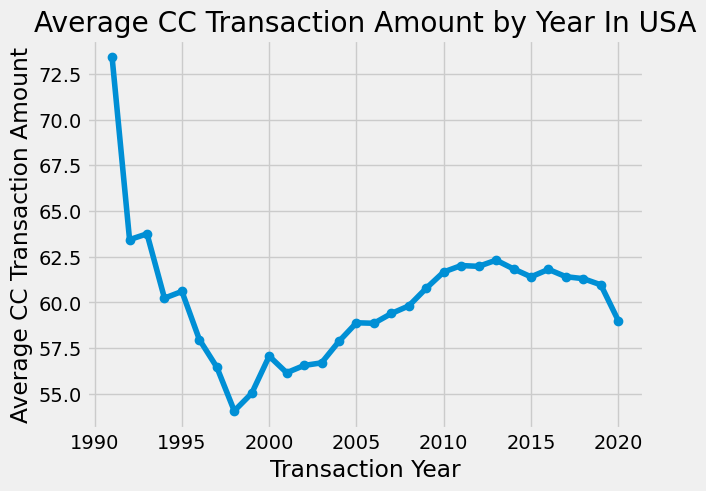

In [23]:
# Plot Avg Credit Card Transaction Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['avg_txn'], marker='o')
plt.title('Average CC Transaction Amount by Year In USA')
plt.xlabel('Transaction Year')
plt.ylabel('Average CC Transaction Amount')
plt.show()

### Yrly CC Transaction Count

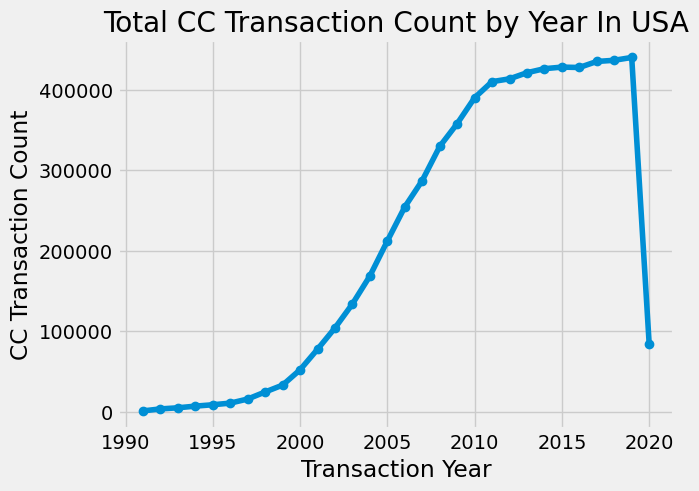

In [24]:
# Plot Total Credit Card Transaction Count Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['txn_count'], marker='o')
plt.title('Total CC Transaction Count by Year In USA')
plt.xlabel('Transaction Year')
plt.ylabel('CC Transaction Count')
plt.show()

### Yrly CC Trancastion Total

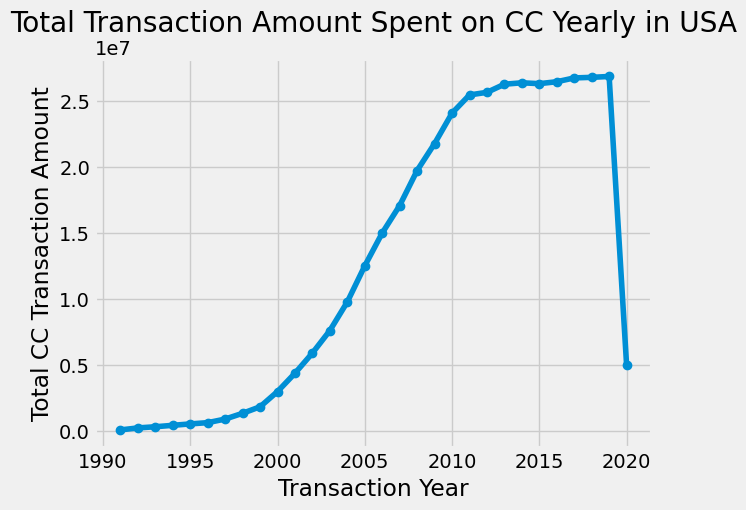

In [25]:
# Plot Total Credit Card Transaction Amount Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['total_spending'], marker='o')
plt.title('Total Transaction Amount Spent on CC Yearly in USA')
plt.xlabel('Transaction Year')
plt.ylabel('Total CC Transaction Amount')
plt.show()

### Check 2020 discrepency

In [26]:
# Filter transactions for 2020
df_2020 = df_credit_usa[df_credit_usa['txn_year'] == 2020]

In [27]:
# Check earliest and latest transaction dates
print("Earliest txn_date in 2020:", df_2020['txn_date'].min())
print("Latest txn_date in 2020:", df_2020['txn_date'].max())

Earliest txn_date in 2020: 2020-01-01 00:00:00
Latest txn_date in 2020: 2020-02-28 00:00:00


In [28]:
# Check 2: Count transactions per month to spot gaps
df_2020.groupby('txn_month')['txn_amount'].count()

txn_month
1    42778
2    41541
Name: txn_amount, dtype: int64

### Wrangle df_yrly_summary

In [29]:
# Remove 2020 data as it is incomplete
df_yrly_summary = df_yrly_summary[df_yrly_summary['txn_year'] != 2020]

In [30]:
# Check the result
df_yrly_summary.head(29)

txn_year    avg_txn  txn_count  total_spending
0       1991  73.394802        758        55633.26
1       1992  63.435582       3255       206482.82
2       1993  63.753168       4624       294794.65
3       1994  60.238194       6704       403836.85
4       1995  60.603938       8405       509376.10
5       1996  57.971683      10443       605398.29
6       1997  56.463829      15524       876544.48
7       1998  54.072922      24303      1314134.23
8       1999  55.036439      32827      1806681.19
9       2000  57.068504      51852      2959116.07
10      2001  56.160738      77388      4346167.17
11      2002  56.557292     103862      5874153.50
12      2003  56.700553     133686      7580070.19
13      2004  57.875938     168427      9747870.66
14      2005  58.890707     211887     12478175.30
15      2006  58.863795     254270     14967297.08
16      2007  59.397955     287031     17049054.33
17      2008  59.814513     329357     19700328.70
18      2009  60.780878     357694     21740955.47
19      2010  61.670091     389907     24045599.98
20      2011  62.019442     409919     25422947.76
21      2012  61.975351     413407     25621043.98
22      2013  62.314031     421019     26235390.82
23      2014  61.834540     426010     26342132.37
24      2015  61.402581     427961     26277910.16
25      2016  61.809695     427500     26423644.40
26      2017  61.409211     434986     26712147.16
27      2018  61.301939     436456     26755598.89
28      2019  60.965446     439968     26822845.21

### Plot after revision

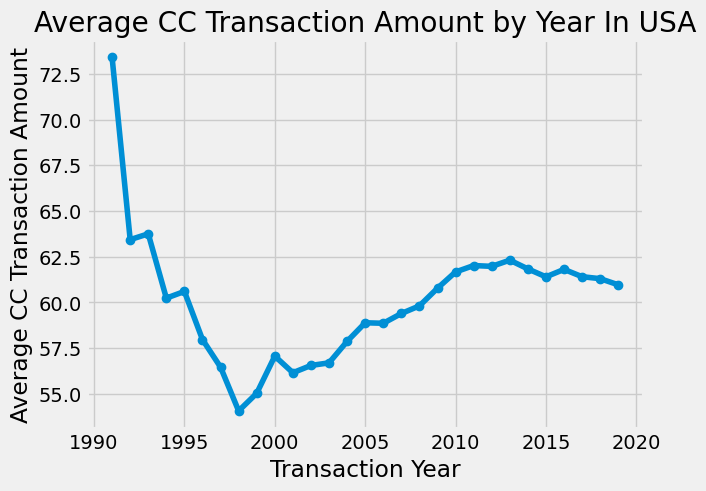

In [31]:
# Plot Avg Credit Card Transaction Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['avg_txn'], marker='o')
plt.title('Average CC Transaction Amount by Year In USA')
plt.xlabel('Transaction Year')
plt.ylabel('Average CC Transaction Amount')
plt.show()

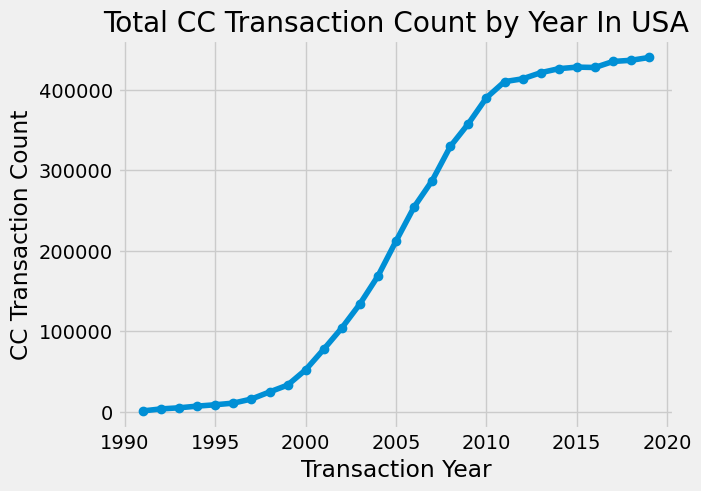

In [32]:
# Plot Total Credit Card Transaction Count Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['txn_count'], marker='o')
plt.title('Total CC Transaction Count by Year In USA')
plt.xlabel('Transaction Year')
plt.ylabel('CC Transaction Count')
plt.show()

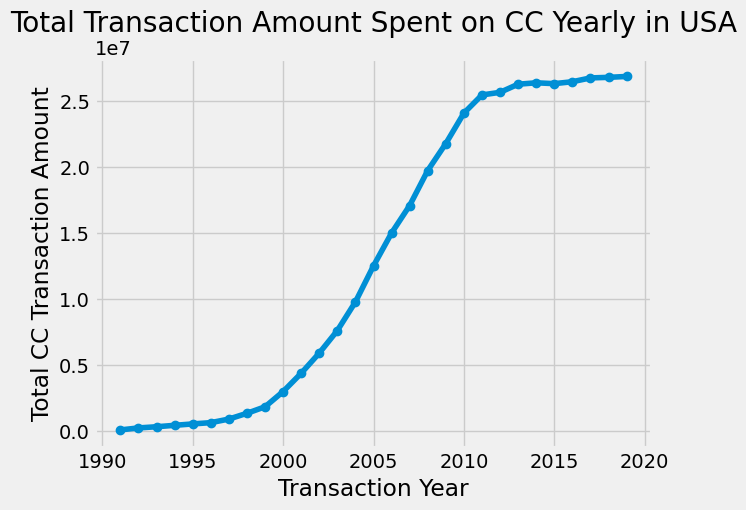

In [33]:
# Plot Total Credit Card Transaction Amount Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['total_spending'], marker='o')
plt.title('Total Transaction Amount Spent on CC Yearly in USA')
plt.xlabel('Transaction Year')
plt.ylabel('Total CC Transaction Amount')
plt.show()

## YoY Growth Rates

### YoY Yrly CC Transaction Avg Growth

In [34]:
# YoY growth of average spending per transaction
df_yrly_summary['yoy_avg_txn_growth'] = df_yrly_summary['avg_txn'].pct_change() * 100

In [35]:
df_yrly_summary.head(29)

txn_year    avg_txn  txn_count  total_spending  yoy_avg_txn_growth
0       1991  73.394802        758        55633.26                 NaN
1       1992  63.435582       3255       206482.82          -13.569380
2       1993  63.753168       4624       294794.65            0.500643
3       1994  60.238194       6704       403836.85           -5.513412
4       1995  60.603938       8405       509376.10            0.607164
5       1996  57.971683      10443       605398.29           -4.343372
6       1997  56.463829      15524       876544.48           -2.601019
7       1998  54.072922      24303      1314134.23           -4.234404
8       1999  55.036439      32827      1806681.19            1.781884
9       2000  57.068504      51852      2959116.07            3.692217
10      2001  56.160738      77388      4346167.17           -1.590661
11      2002  56.557292     103862      5874153.50            0.706107
12      2003  56.700553     133686      7580070.19            0.253303
13      2004  57.875938     168427      9747870.66            2.072969
14      2005  58.890707     211887     12478175.30            1.753352
15      2006  58.863795     254270     14967297.08           -0.045699
16      2007  59.397955     287031     17049054.33            0.907451
17      2008  59.814513     329357     19700328.70            0.701302
18      2009  60.780878     357694     21740955.47            1.615603
19      2010  61.670091     389907     24045599.98            1.462980
20      2011  62.019442     409919     25422947.76            0.566485
21      2012  61.975351     413407     25621043.98           -0.071092
22      2013  62.314031     421019     26235390.82            0.546474
23      2014  61.834540     426010     26342132.37           -0.769474
24      2015  61.402581     427961     26277910.16           -0.698572
25      2016  61.809695     427500     26423644.40            0.663023
26      2017  61.409211     434986     26712147.16           -0.647930
27      2018  61.301939     436456     26755598.89           -0.174685
28      2019  60.965446     439968     26822845.21           -0.548911

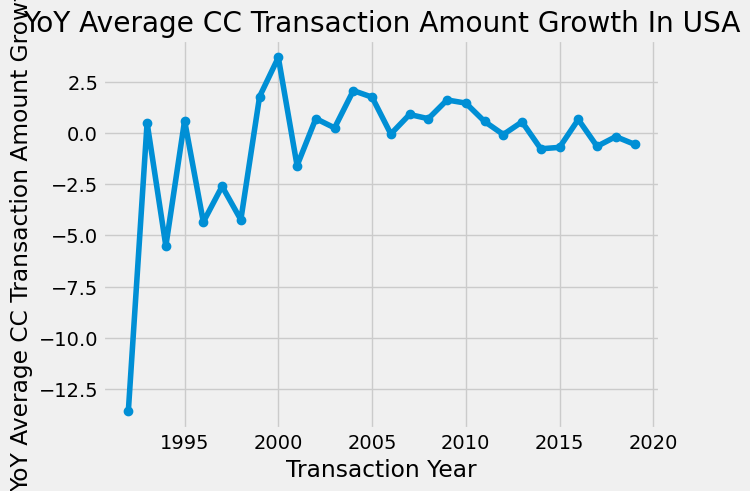

In [36]:
# Plot Avg Credit Card Transaction Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['yoy_avg_txn_growth'], marker='o')
plt.title('YoY Average CC Transaction Amount Growth In USA')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Average CC Transaction Amount Growth')
plt.show()

### YoY Yrly CC Transaction Count Growth

In [37]:
# YoY Count Growth
df_yrly_summary['yoy_txn_count_growth'] = (df_yrly_summary['txn_count'].pct_change() * 100)

In [38]:
df_yrly_summary.head(29)

txn_year    avg_txn  txn_count  total_spending  yoy_avg_txn_growth  \
0       1991  73.394802        758        55633.26                 NaN   
1       1992  63.435582       3255       206482.82          -13.569380   
2       1993  63.753168       4624       294794.65            0.500643   
3       1994  60.238194       6704       403836.85           -5.513412   
4       1995  60.603938       8405       509376.10            0.607164   
5       1996  57.971683      10443       605398.29           -4.343372   
6       1997  56.463829      15524       876544.48           -2.601019   
7       1998  54.072922      24303      1314134.23           -4.234404   
8       1999  55.036439      32827      1806681.19            1.781884   
9       2000  57.068504      51852      2959116.07            3.692217   
10      2001  56.160738      77388      4346167.17           -1.590661   
11      2002  56.557292     103862      5874153.50            0.706107   
12      2003  56.700553     133686      7580070.19            0.253303   
13      2004  57.875938     168427      9747870.66            2.072969   
14      2005  58.890707     211887     12478175.30            1.753352   
15      2006  58.863795     254270     14967297.08           -0.045699   
16      2007  59.397955     287031     17049054.33            0.907451   
17      2008  59.814513     329357     19700328.70            0.701302   
18      2009  60.780878     357694     21740955.47            1.615603   
19      2010  61.670091     389907     24045599.98            1.462980   
20      2011  62.019442     409919     25422947.76            0.566485   
21      2012  61.975351     413407     25621043.98           -0.071092   
22      2013  62.314031     421019     26235390.82            0.546474   
23      2014  61.834540     426010     26342132.37           -0.769474   
24      2015  61.402581     427961     26277910.16           -0.698572   
25      2016  61.809695     427500     26423644.40            0.663023   
26      2017  61.409211     434986     26712147.16           -0.647930   
27      2018  61.301939     436456     26755598.89           -0.174685   
28      2019  60.965446     439968     26822845.21           -0.548911   

    yoy_txn_count_growth  
0                    NaN  
1             329.419525  
2              42.058372  
3              44.982699  
4              25.372912  
5              24.247472  
6              48.654601  
7              56.551147  
8              35.073859  
9              57.955342  
10             49.247859  
11             34.209438  
12             28.715026  
13             25.987014  
14             25.803464  
15             20.002643  
16             12.884336  
17             14.746142  
18              8.603734  
19              9.005742  
20              5.132506  
21              0.850900  
22              1.841285  
23              1.185457  
24              0.457970  
25             -0.107720  
26              1.751111  
27              0.337942  
28              0.804663

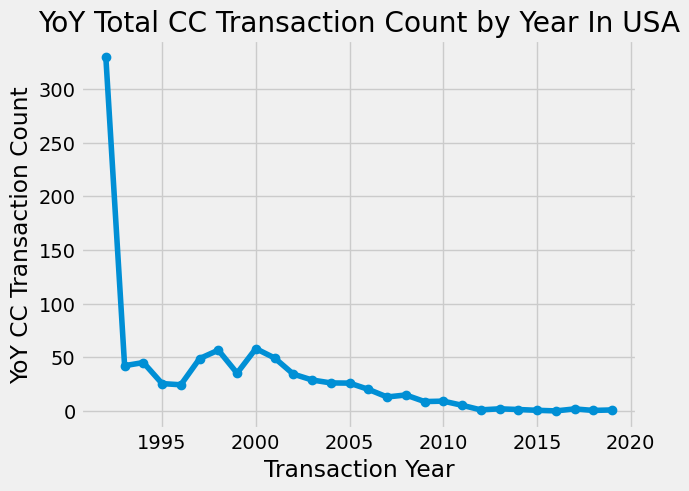

In [39]:
# Plot Total Credit Card Transaction Count Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['yoy_txn_count_growth'], marker='o')
plt.title('YoY Total CC Transaction Count by Year In USA')
plt.xlabel('Transaction Year')
plt.ylabel('YoY CC Transaction Count')
plt.show()

### YoY Yrly CC Transaction Total Growth

In [40]:
# YoY Spending Growth
df_yrly_summary['yoy_total_spending_growth'] = (df_yrly_summary['total_spending'].pct_change() * 100)

In [41]:
df_yrly_summary.head(29)

txn_year    avg_txn  txn_count  total_spending  yoy_avg_txn_growth  \
0       1991  73.394802        758        55633.26                 NaN   
1       1992  63.435582       3255       206482.82          -13.569380   
2       1993  63.753168       4624       294794.65            0.500643   
3       1994  60.238194       6704       403836.85           -5.513412   
4       1995  60.603938       8405       509376.10            0.607164   
5       1996  57.971683      10443       605398.29           -4.343372   
6       1997  56.463829      15524       876544.48           -2.601019   
7       1998  54.072922      24303      1314134.23           -4.234404   
8       1999  55.036439      32827      1806681.19            1.781884   
9       2000  57.068504      51852      2959116.07            3.692217   
10      2001  56.160738      77388      4346167.17           -1.590661   
11      2002  56.557292     103862      5874153.50            0.706107   
12      2003  56.700553     133686      7580070.19            0.253303   
13      2004  57.875938     168427      9747870.66            2.072969   
14      2005  58.890707     211887     12478175.30            1.753352   
15      2006  58.863795     254270     14967297.08           -0.045699   
16      2007  59.397955     287031     17049054.33            0.907451   
17      2008  59.814513     329357     19700328.70            0.701302   
18      2009  60.780878     357694     21740955.47            1.615603   
19      2010  61.670091     389907     24045599.98            1.462980   
20      2011  62.019442     409919     25422947.76            0.566485   
21      2012  61.975351     413407     25621043.98           -0.071092   
22      2013  62.314031     421019     26235390.82            0.546474   
23      2014  61.834540     426010     26342132.37           -0.769474   
24      2015  61.402581     427961     26277910.16           -0.698572   
25      2016  61.809695     427500     26423644.40            0.663023   
26      2017  61.409211     434986     26712147.16           -0.647930   
27      2018  61.301939     436456     26755598.89           -0.174685   
28      2019  60.965446     439968     26822845.21           -0.548911   

    yoy_txn_count_growth  yoy_total_spending_growth  
0                    NaN                        NaN  
1             329.419525                 271.149956  
2              42.058372                  42.769578  
3              44.982699                  36.989206  
4              25.372912                  26.134131  
5              24.247472                  18.850941  
6              48.654601                  44.788067  
7              56.551147                  49.922139  
8              35.073859                  37.480719  
9              57.955342                  63.787396  
10             49.247859                  46.873832  
11             34.209438                  35.157100  
12             28.715026                  29.041064  
13             25.987014                  28.598686  
14             25.803464                  28.009242  
15             20.002643                  19.947803  
16             12.884336                  13.908705  
17             14.746142                  15.550859  
18              8.603734                  10.358339  
19              9.005742                  10.600475  
20              5.132506                   5.728066  
21              0.850900                   0.779202  
22              1.841285                   2.397821  
23              1.185457                   0.406861  
24              0.457970                  -0.243800  
25             -0.107720                   0.554588  
26              1.751111                   1.091836  
27              0.337942                   0.162667  
28              0.804663                   0.251336

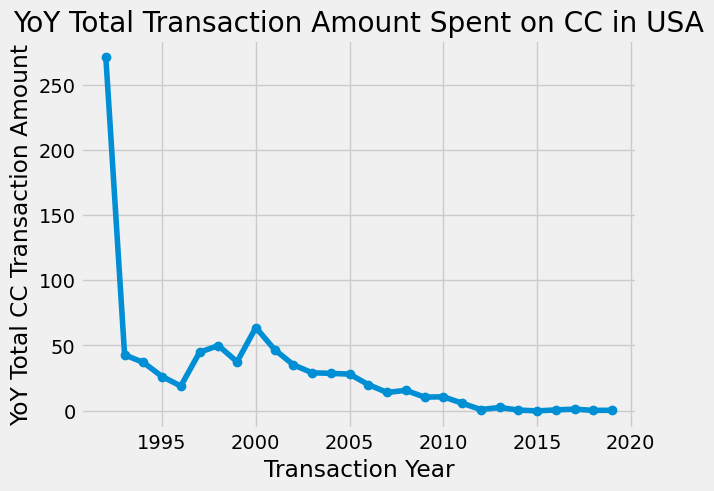

In [42]:
# Plot Total Credit Card Transaction Amount Per Year
plt.plot(df_yrly_summary['txn_year'], df_yrly_summary['yoy_total_spending_growth'], marker='o')
plt.title('YoY Total Transaction Amount Spent on CC in USA')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Total CC Transaction Amount')
plt.show()

### df yearly summary filtered (1993 - 2019)

In [43]:
# Filter to years 1993–2019
df_filtered = df_yrly_summary[(df_yrly_summary['txn_year'] >= 1993)]

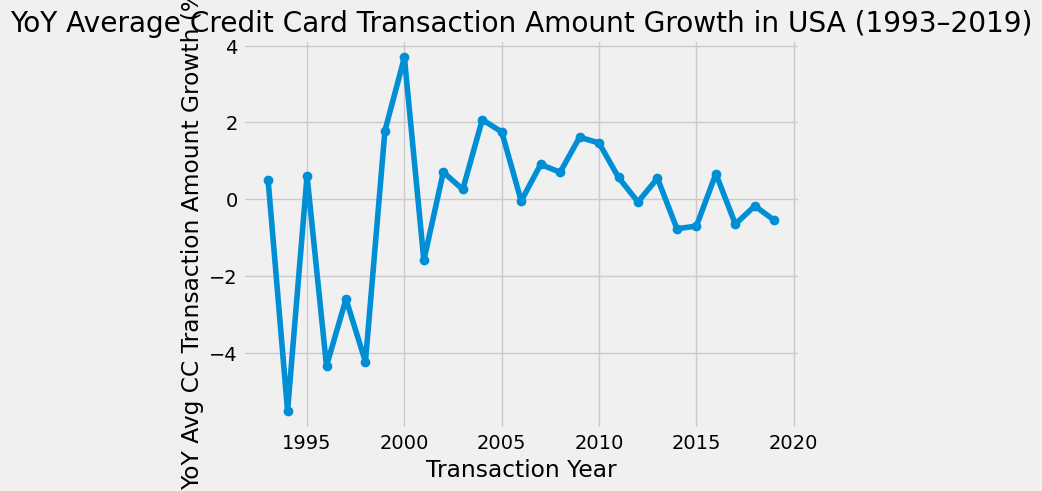

In [44]:
# Plot YoY Average Credit Card Transaction Amount Growth
plt.plot(df_filtered['txn_year'], df_filtered['yoy_avg_txn_growth'], marker='o')
plt.title('YoY Average Credit Card Transaction Amount Growth in USA (1993–2019)')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Avg CC Transaction Amount Growth (%)')
plt.show()


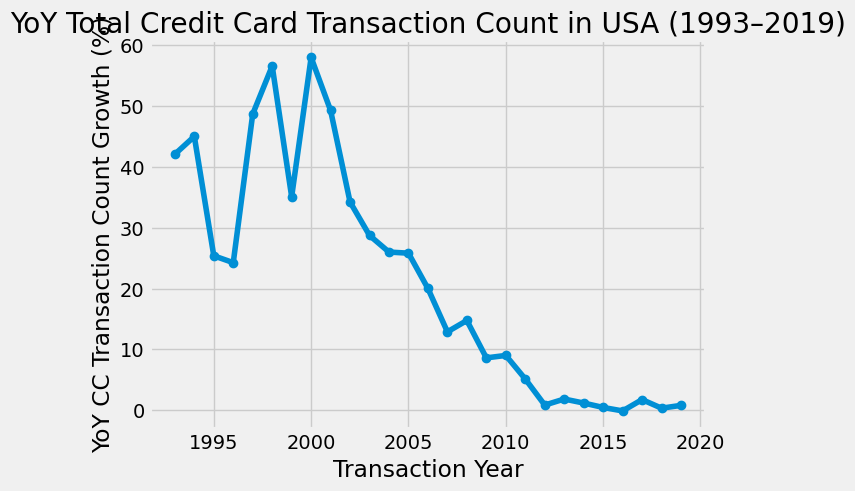

In [45]:
# Plot YoY Total Credit Card Transaction Count Growth
plt.plot(df_filtered['txn_year'], df_filtered['yoy_txn_count_growth'], marker='o')
plt.title('YoY Total Credit Card Transaction Count in USA (1993–2019)')
plt.xlabel('Transaction Year')
plt.ylabel('YoY CC Transaction Count Growth (%)')
plt.show()


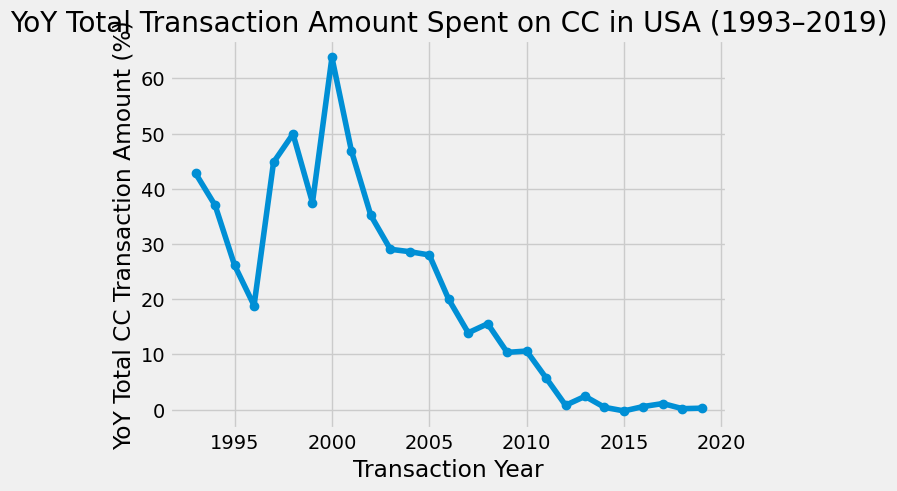

In [46]:
# Plot YoY Total Spending Growth for that range
plt.plot(df_filtered['txn_year'], df_filtered['yoy_total_spending_growth'], marker='o')
plt.title('YoY Total Transaction Amount Spent on CC in USA (1993–2019)')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Total CC Transaction Amount (%)')
plt.show()


## Export

In [47]:
# Export to CSV
df_yrly_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_yrly_summary.csv'), index=False)

# 06. Spending by MCC Category

## Aggregated DF

In [48]:
# Group by MCC and Year, then calculate totals and counts
df_mcc_summary = df_credit_usa.groupby(['txn_year', 'MCC']).agg(
    total_spending=('txn_amount', 'sum'),
    txn_count=('txn_amount', 'count'),
    avg_per_txn=('txn_amount', 'mean')
).reset_index()

In [49]:
unique_mcc = df_credit_usa['MCC'].unique()
print(unique_mcc)

[5411 5541 5912 4900 7538 3058 5300 5942 5211 5311 5499 5812 8043 4814
 5814 3640 5651 5310 4829 3504 3001 5719 3066 3596 8021 5621 7349 6300
 7230 7995 5712 5921 5970 9402 5813 4131 3509 7832 7011 3256 5655 7542
 3780 5733 5533 3008 8011 3722 4112 5193 7210 5251 4899 3174 3359 3390
 3387 3000 1711 3730 3775 7996 5932 3260 3684 3132 3771 5661 8041 8111
 8049 3389 4214 5094 5816 3405 8099 7802 7531 3395 7549 3393 3007 5732
 5947 3009 7276 5977 7922 4121 3075 3006 3144 3005 5941 8062 8931 5045
 5722 5261 5192 4111 7393]


In [50]:
df_mcc_summary.head(30)

txn_year   MCC  total_spending  txn_count  avg_per_txn
0       1991  3001           70.25          1    70.250000
1       1991  3058          355.71          1   355.710000
2       1991  3174           73.65          1    73.650000
3       1991  3359          694.62          2   347.310000
4       1991  3684          563.64          2   281.820000
5       1991  3722          412.44          2   206.220000
6       1991  3730         1111.22          4   277.805000
7       1991  3775          918.01          4   229.502500
8       1991  4214          149.93          9    16.658889
9       1991  4814         3688.56         20   184.428000
10      1991  4829         9460.00         94   100.638298
11      1991  4899          624.24          5   124.848000
12      1991  4900         2594.19         22   117.917727
13      1991  5193           48.91          1    48.910000
14      1991  5211          387.99         12    32.332500
15      1991  5251          111.51          4    27.877500
16      1991  5300         4005.58         38   105.410000
17      1991  5310         1170.12         18    65.006667
18      1991  5311         3204.59         35    91.559714
19      1991  5411         2689.59         92    29.234674
20      1991  5499         2136.55         31    68.920968
21      1991  5541         5547.26         89    62.328764
22      1991  5651          235.48          1   235.480000
23      1991  5719          364.48          8    45.560000
24      1991  5732          330.76          1   330.760000
25      1991  5733         1122.29          1  1122.290000
26      1991  5812         1149.50         73    15.746575
27      1991  5813          692.20         18    38.455556
28      1991  5814          490.70         30    16.356667
29      1991  5912         1654.43         18    91.912778

## Treemap

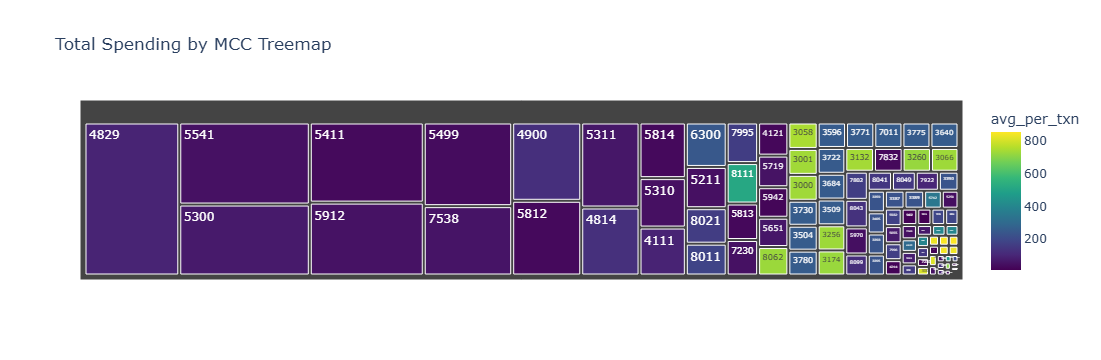

In [51]:
# Treemap for total spending per MCC
fig = px.treemap(
    df_mcc_summary,
    path=['MCC'],          # Hierarchy (just MCC here)
    values='total_spending',
    color='avg_per_txn',   # optional: color by average per transaction
    color_continuous_scale='Viridis',
    title='Total Spending by MCC Treemap'
)
fig.show()


In [52]:
# Sort MCCs to keep order consistent
df_mcc_summary = df_mcc_summary.sort_values('MCC').reset_index(drop=True)

In [53]:
# Number of columns you want in the heatmap
n_cols = 10

In [54]:
# Create column and row positions
df_mcc_summary['grid_col'] = df_mcc_summary.index % n_cols
df_mcc_summary['grid_row'] = df_mcc_summary.index // n_cols

## Export

In [80]:
df_mcc_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_mcc_summary.csv'), index=False)

# 07. Spending Demographic Trend

## Gender

In [56]:
# Create Aggregate Gender Domographic dataframe
df_gender_summary = (df_credit_usa.groupby(['txn_year', 'gender']).agg(
          total_spend=('txn_amount', 'sum'),
          txn_count=('txn_amount', 'count'),
          avg_txn=('txn_amount', 'mean')).reset_index())

In [57]:
df_gender_summary.head(60)

txn_year  gender  total_spend  txn_count    avg_txn
0       1991    Male     55633.26        758  73.394802
1       1992    Male    206482.82       3255  63.435582
2       1993  Female     31340.12        581  53.941687
3       1993    Male    263454.53       4043  65.163129
4       1994  Female     39015.98        728  53.593379
5       1994    Male    364820.87       5976  61.047669
6       1995  Female    110732.89       1805  61.347861
7       1995    Male    398643.21       6600  60.400486
8       1996  Female    131184.06       2350  55.823004
9       1996    Male    474214.23       8093  58.595605
10      1997  Female    244796.22       4331  56.521870
11      1997    Male    631748.26      11193  56.441370
12      1998  Female    496840.40       8625  57.604684
13      1998    Male    817293.83      15678  52.129980
14      1999  Female    818181.91      14378  56.905127
15      1999    Male    988499.28      18449  53.580101
16      2000  Female   1314241.57      22396  58.681978
17      2000    Male   1644874.50      29456  55.841747
18      2001  Female   2214119.16      37940  58.358439
19      2001    Male   2132048.01      39448  54.047050
20      2002  Female   2964147.68      51141  57.960300
21      2002    Male   2910005.82      52721  55.196332
22      2003  Female   3863226.94      68660  56.266049
23      2003    Male   3716843.25      65026  57.159340
24      2004  Female   5016838.01      87191  57.538485
25      2004    Male   4731032.65      81236  58.238129
26      2005  Female   6407021.24     109163  58.692242
27      2005    Male   6071154.06     102724  59.101613
28      2006  Female   7618768.15     130752  58.268846
29      2006    Male   7348528.93     123518  59.493587
30      2007  Female   8557066.19     145135  58.959356
31      2007    Male   8491988.14     141896  59.846565
32      2008  Female   9709884.14     164460  59.041008
33      2008    Male   9990444.56     164897  60.585969
34      2009  Female  10924761.51     180425  60.550154
35      2009    Male  10816193.96     177269  61.015710
36      2010  Female  12083216.84     198022  61.019568
37      2010    Male  11962383.14     191885  62.341419
38      2011  Female  12885918.22     211241  61.001028
39      2011    Male  12537029.54     198678  63.102254
40      2012  Female  12972562.47     210895  61.511949
41      2012    Male  12648481.51     202512  62.457936
42      2013  Female  13317064.08     214859  61.980481
43      2013    Male  12918326.74     206160  62.661655
44      2014  Female  13430718.80     219013  61.323843
45      2014    Male  12911413.57     206997  62.374883
46      2015  Female  13367039.28     220677  60.572870
47      2015    Male  12910870.88     207284  62.285902
48      2016  Female  13217699.13     216878  60.945320
49      2016    Male  13205945.27     210622  62.699743
50      2017  Female  13303062.18     220972  60.202479
51      2017    Male  13409084.98     214014  62.655177
52      2018  Female  13529095.58     222402  60.831717
53      2018    Male  13226503.31     214054  61.790498
54      2019  Female  13610119.01     225352  60.394933
55      2019    Male  13212726.20     214616  61.564498
56      2020  Female   2463306.05      41841  58.873020
57      2020    Male   2512417.04      42478  59.146312

In [58]:
# Remove 2020 data as it is incomplete
df_gender_summary = df_gender_summary[df_gender_summary['txn_year'] != 2020]

In [59]:
df_gender_summary.tail()

txn_year  gender  total_spend  txn_count    avg_txn
51      2017    Male  13409084.98     214014  62.655177
52      2018  Female  13529095.58     222402  60.831717
53      2018    Male  13226503.31     214054  61.790498
54      2019  Female  13610119.01     225352  60.394933
55      2019    Male  13212726.20     214616  61.564498

In [60]:
color_map = {'Male': 'blue', 'Female': 'pink'}

### Avg transaction yearly by gender

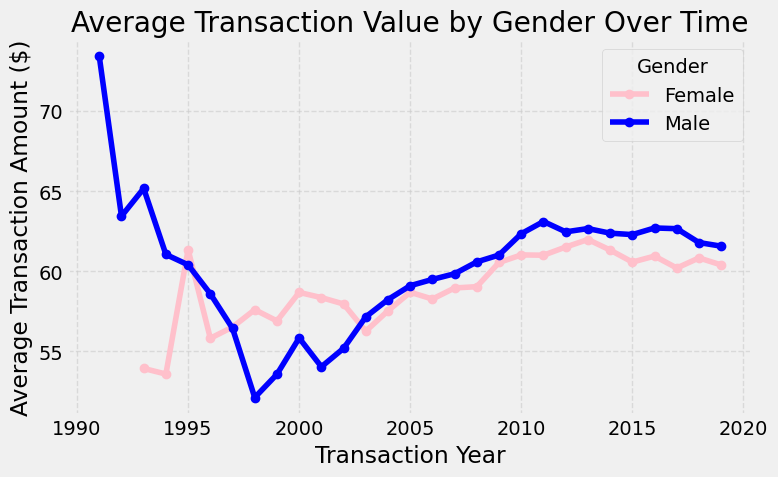

In [61]:
plt.figure(figsize=(8,5))

for gender, data in df_gender_summary.groupby('gender'):
    plt.plot(data['txn_year'], data['avg_txn'], marker='o', label=gender, color=color_map[gender])

plt.title('Average Transaction Value by Gender Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Average Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Transaction count yearly by gender

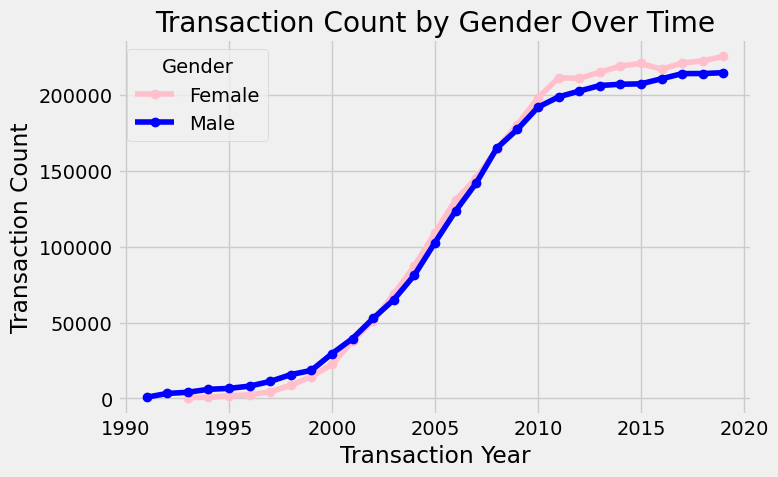

In [62]:
plt.figure(figsize=(8,5))

for gender, data in df_gender_summary.groupby('gender'):
    plt.plot(data['txn_year'], data['txn_count'], marker='o', label=gender, color=color_map[gender])

plt.title('Transaction Count by Gender Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Transaction Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Total spend yearly by gender

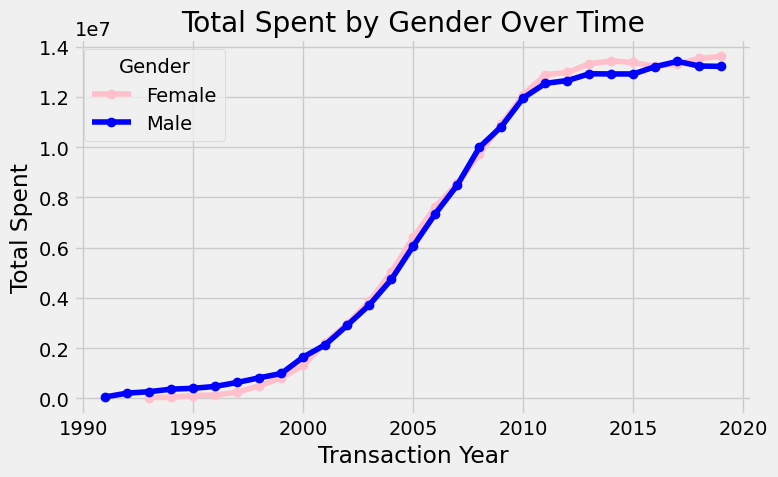

In [63]:
plt.figure(figsize=(8,5))

for gender, data in df_gender_summary.groupby('gender'):
    plt.plot(data['txn_year'], data['total_spend'], marker='o', label=gender, color=color_map[gender])

plt.title('Total Spent by Gender Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Total Spent')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Age Group

In [64]:
# Create Aggregate Age Group Domographic dataframe
df_age_summary = (df_credit_usa.groupby(['txn_year', 'Age Group']).agg(
          total_spend=('txn_amount', 'sum'),
          txn_count=('txn_amount', 'count'),
          avg_txn=('txn_amount', 'mean')).reset_index())

In [65]:
df_age_summary.head()

txn_year Age Group  total_spend  txn_count    avg_txn
0      1991     Adult     55633.26        758  73.394802
1      1992     Adult    200727.77       3172  63.281138
2      1992    Senior      5755.05         83  69.337952
3      1993     Adult    204122.37       3108  65.676438
4      1993    Senior     90672.28       1516  59.810211

In [66]:
# Remove 2020 data as it is incomplete
df_age_summary = df_age_summary[df_age_summary['txn_year'] != 2020]

In [67]:
df_age_summary.tail()

txn_year    Age Group  total_spend  txn_count    avg_txn
62      2018       Senior   5560679.74      89094  62.413628
63      2018  Young Adult   1628368.30      29150  55.861691
64      2019        Adult  19508280.80     319137  61.128233
65      2019       Senior   5521473.33      88749  62.214485
66      2019  Young Adult   1793091.08      32082  55.890876

### Avg Txn yearly by age group

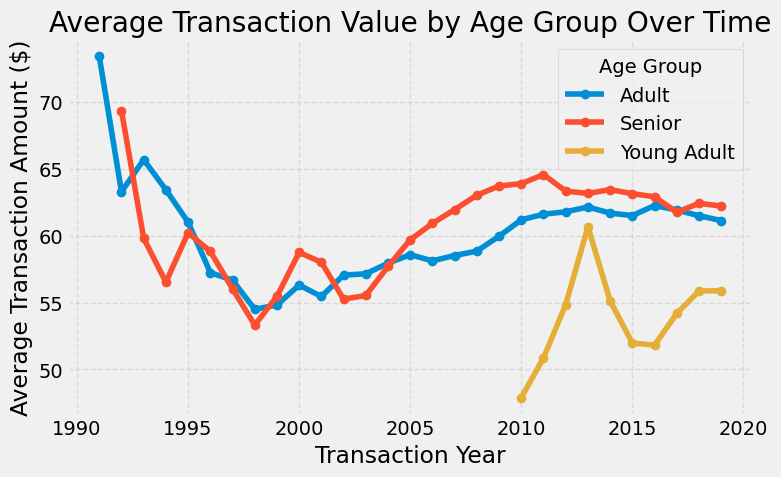

In [68]:
plt.figure(figsize=(8,5))

for age_group, data in df_age_summary.groupby('Age Group'):
    plt.plot(data['txn_year'], data['avg_txn'], marker='o', label=age_group)

plt.title('Average Transaction Value by Age Group Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Average Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


### Txn Count yearly by age group

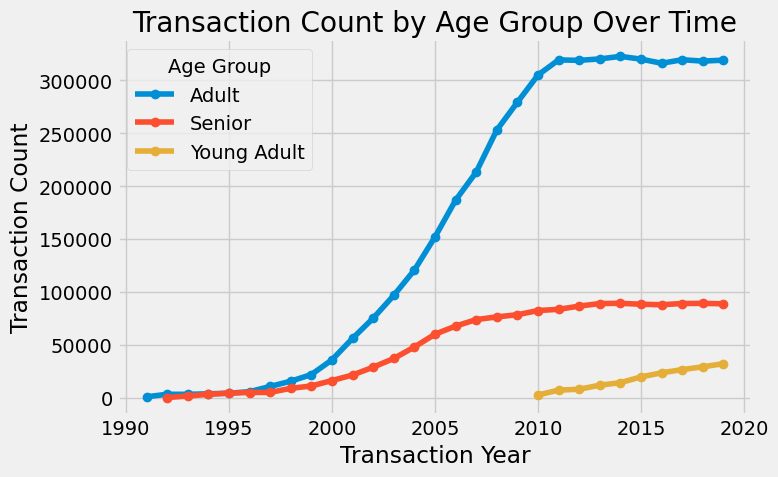

In [69]:
plt.figure(figsize=(8,5))

for age_group, data in df_age_summary.groupby('Age Group'):
    plt.plot(data['txn_year'], data['txn_count'], marker='o', label=age_group)

plt.title('Transaction Count by Age Group Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Transaction Count')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Total Spent yearly by age group

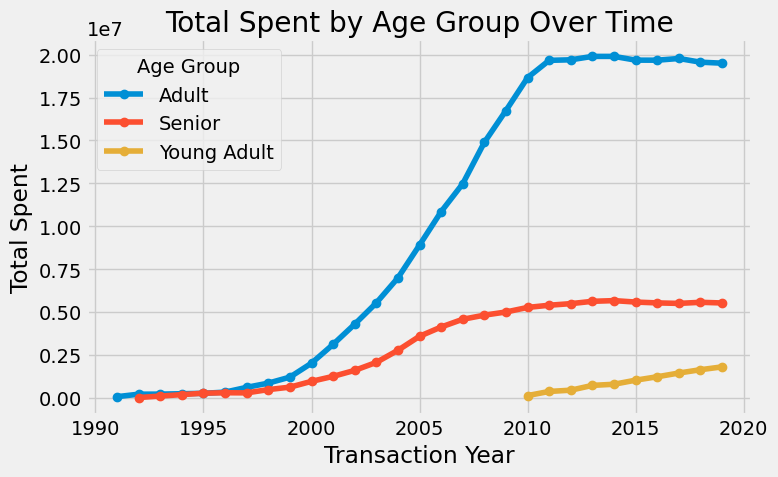

In [70]:
plt.figure(figsize=(8,5))

for age_group, data in df_age_summary.groupby('Age Group'):
    plt.plot(data['txn_year'], data['total_spend'], marker='o', label=age_group)

plt.title('Total Spent by Age Group Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Total Spent')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

## Income

In [71]:
# Create Aggregate Income Domographic dataframe
df_income_summary = (df_credit_usa.groupby(['txn_year', 'Income Bracket']).agg(
          total_spend=('txn_amount', 'sum'),
          txn_count=('txn_amount', 'count'),
          avg_txn=('txn_amount', 'mean')).reset_index())

In [72]:
df_income_summary.head(30)

txn_year          Income Bracket  total_spend  txn_count    avg_txn
0       1991         10% ($0–11,925)         0.00          0        NaN
1       1991    12% ($11,925–48,475)     15477.58        236  65.582966
2       1991   22% ($48,475–103,350)     40155.68        522  76.926590
3       1991  24% ($103,350–197,300)         0.00          0        NaN
4       1991  32% ($197,300–250,525)         0.00          0        NaN
5       1991  35% ($250,525–375,800)         0.00          0        NaN
6       1992         10% ($0–11,925)         0.00          0        NaN
7       1992    12% ($11,925–48,475)    162196.15       2690  60.295967
8       1992   22% ($48,475–103,350)     44286.67        565  78.383487
9       1992  24% ($103,350–197,300)         0.00          0        NaN
10      1992  32% ($197,300–250,525)         0.00          0        NaN
11      1992  35% ($250,525–375,800)         0.00          0        NaN
12      1993         10% ($0–11,925)         0.00          0        NaN
13      1993    12% ($11,925–48,475)    253465.87       4095  61.896427
14      1993   22% ($48,475–103,350)     41328.78        529  78.126238
15      1993  24% ($103,350–197,300)         0.00          0        NaN
16      1993  32% ($197,300–250,525)         0.00          0        NaN
17      1993  35% ($250,525–375,800)         0.00          0        NaN
18      1994         10% ($0–11,925)     21688.21        392  55.327066
19      1994    12% ($11,925–48,475)    339492.98       5737  59.176047
20      1994   22% ($48,475–103,350)     42655.66        575  74.183757
21      1994  24% ($103,350–197,300)         0.00          0        NaN
22      1994  32% ($197,300–250,525)         0.00          0        NaN
23      1994  35% ($250,525–375,800)         0.00          0        NaN
24      1995         10% ($0–11,925)     40988.30        797  51.428231
25      1995    12% ($11,925–48,475)    427570.14       7053  60.622450
26      1995   22% ($48,475–103,350)     40817.66        555  73.545333
27      1995  24% ($103,350–197,300)         0.00          0        NaN
28      1995  32% ($197,300–250,525)         0.00          0        NaN
29      1995  35% ($250,525–375,800)         0.00          0        NaN

In [73]:
# Remove 2020 data as it is incomplete
df_income_summary = df_income_summary[df_income_summary['txn_year'] != 2020]

In [74]:
df_income_summary.tail(10)

txn_year          Income Bracket  total_spend  txn_count     avg_txn
164      2018   22% ($48,475–103,350)  11697733.27     151926   76.996257
165      2018  24% ($103,350–197,300)    706556.51       6437  109.764876
166      2018  32% ($197,300–250,525)         0.00          0         NaN
167      2018  35% ($250,525–375,800)     37722.81        240  157.178375
168      2019         10% ($0–11,925)    199844.99       6512   30.688727
169      2019    12% ($11,925–48,475)  14162803.72     273226   51.835490
170      2019   22% ($48,475–103,350)  11734002.20     153844   76.272082
171      2019  24% ($103,350–197,300)    686717.22       6146  111.734009
172      2019  32% ($197,300–250,525)         0.00          0         NaN
173      2019  35% ($250,525–375,800)     39477.08        240  164.487833

### Avg Txn yearly by Income Bracket

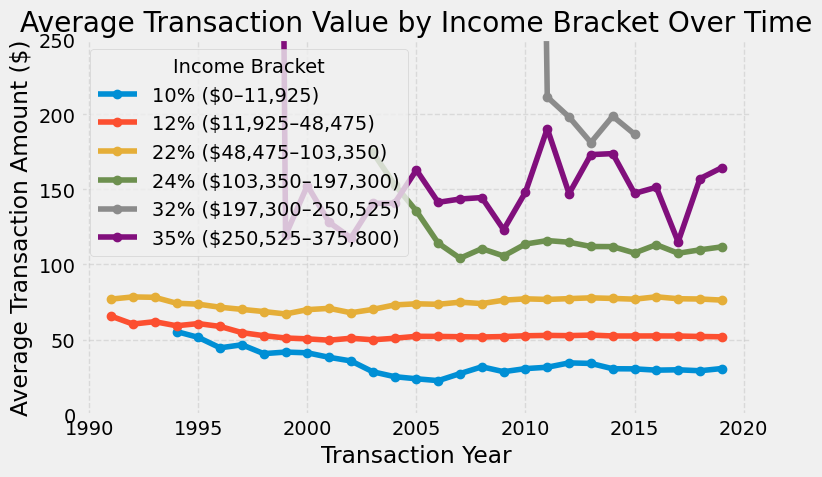

In [75]:
plt.figure(figsize=(8,5))

for income_bracket, data in df_income_summary.groupby('Income Bracket'):
    plt.plot(data['txn_year'], data['avg_txn'], marker='o', label=income_bracket)

plt.title('Average Transaction Value by Income Bracket Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Average Transaction Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 250)
plt.legend(title='Income Bracket')
plt.tight_layout()
plt.show()


### Txn count yearly by Income Bracket

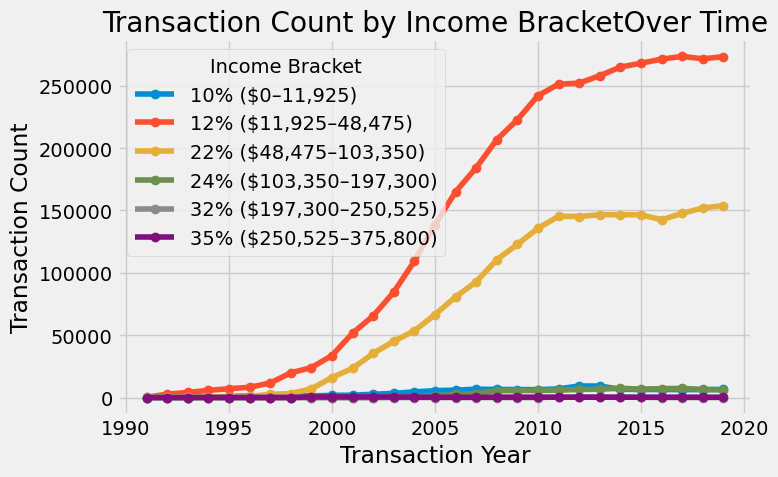

In [76]:
plt.figure(figsize=(8,5))

for income_bracket, data in df_income_summary.groupby('Income Bracket'):
    plt.plot(data['txn_year'], data['txn_count'], marker='o', label=income_bracket)

plt.title('Transaction Count by Income BracketOver Time')
plt.xlabel('Transaction Year')
plt.ylabel('Transaction Count')
plt.legend(title='Income Bracket')
plt.tight_layout()
plt.show()

### Total Spent yearly by Income Bracket

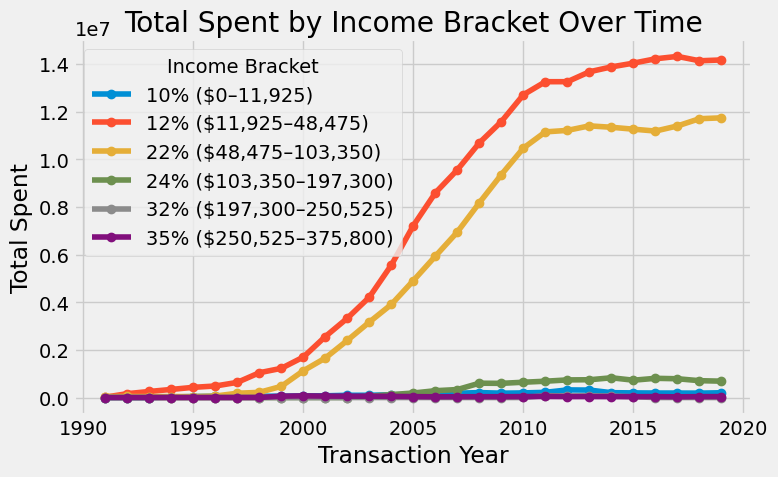

In [77]:
plt.figure(figsize=(8,5))

for income_bracket, data in df_income_summary.groupby('Income Bracket'):
    plt.plot(data['txn_year'], data['total_spend'], marker='o', label=income_bracket)

plt.title('Total Spent by Income Bracket Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('Total Spent')
plt.legend(title='Income Bracket')
plt.tight_layout()
plt.show()

## Export

In [ ]:
# Export gender summary
df_gender_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data','df_gender_summary.csv'), index=False)

In [ ]:
# Export age summary
df_age_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_age_summary.csv'), index=False)

In [ ]:
# Export income summary
df_income_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_income_summary.csv'), index=False)

# 08. Spending by Region

In [78]:
# Create Aggregate Income Domographic dataframe
df_region_summary = (df_credit_usa.groupby(['txn_year', 'merchant_state']).agg(
          total_spend=('txn_amount', 'sum'),
          txn_count=('txn_amount', 'count'),
          avg_txn=('txn_amount', 'mean')).reset_index())

In [79]:
df_region_summary.head(30)

txn_year merchant_state  total_spend  txn_count     avg_txn
0       1991             CA     13344.20        215   62.066047
1       1991             HI      1111.22          4  277.805000
2       1991             MA       186.35          2   93.175000
3       1991             NJ      2696.20         25  107.848000
4       1991             NV       918.01          4  229.502500
5       1991             NY      1313.37          5  262.674000
6       1991             OH      1254.35         16   78.396875
7       1991             PA       343.09          7   49.012857
8       1991             VA     34466.47        480   71.805146
9       1992             AK       503.59          2  251.795000
10      1992             CA    151187.40       2535   59.640000
11      1992             GA      2354.56         34   69.251765
12      1992             HI       553.24          2  276.620000
13      1992             IL      1823.72         11  165.792727
14      1992             NJ       744.56          3  248.186667
15      1992             NV      2127.95          9  236.438889
16      1992             OR      3018.14         52   58.041154
17      1992             TX      3375.43         54   62.507963
18      1992             VA     36037.51        487   73.998994
19      1992             WA      4756.72         66   72.071515
20      1993             AK       417.89          2  208.945000
21      1993             CA    151251.00       2396   63.126461
22      1993             CO       399.25          5   79.850000
23      1993             FL      3220.08         51   63.138824
24      1993             HI       580.89          3  193.630000
25      1993             IL      1480.67         17   87.098235
26      1993             IN      1188.62         14   84.901429
27      1993             LA       394.41          2  197.205000
28      1993             MI      1291.02          8  161.377500
29      1993             MN      1111.79          8  138.973750

In [81]:
# Remove 2020 data as it is incomplete
df_region_summary = df_region_summary[df_region_summary['txn_year'] != 2020]

In [82]:
df_region_summary.tail(30)

txn_year merchant_state  total_spend  txn_count     avg_txn
1262      2019             ME    185778.31       3464   53.631152
1263      2019             MI    881328.40      13796   63.882894
1264      2019             MN    400102.99       5745   69.643688
1265      2019             MO    271182.28       5293   51.234136
1266      2019             MS    195272.08       4078   47.884277
1267      2019             MT     83092.56       1663   49.965460
1268      2019             NC    867082.29      15121   57.342920
1269      2019             ND     45189.88        736   61.399293
1270      2019             NE    143079.60       2752   51.991134
1271      2019             NH    259879.77       5649   46.004562
1272      2019             NJ    769648.24      11379   67.637599
1273      2019             NM    161983.55       3715   43.602571
1274      2019             NV    299529.36       2670  112.183281
1275      2019             NY   1543212.09      24975   61.790274
1276      2019             OH   1106783.83      20146   54.938143
1277      2019             OK    466135.67       8179   56.991768
1278      2019             OR    124318.30       1881   66.091600
1279      2019             PA   1238902.17      18603   66.596902
1280      2019             RI    172111.97       2135   80.614506
1281      2019             SC    339362.42       5740   59.122373
1282      2019             SD     64290.25       1052   61.112405
1283      2019             TN    750508.85      11560   64.922911
1284      2019             TX   2121641.95      36148   58.693204
1285      2019             UT    112152.42       2428   46.191277
1286      2019             VA    574193.25       7850   73.145637
1287      2019             VT     35274.11        617   57.170357
1288      2019             WA    555760.18       9267   59.971963
1289      2019             WI    392710.72       6632   59.214524
1290      2019             WV    152810.48       3004   50.869001
1291      2019             WY     22673.54        329   68.916535

### Yearly avg txn by Region

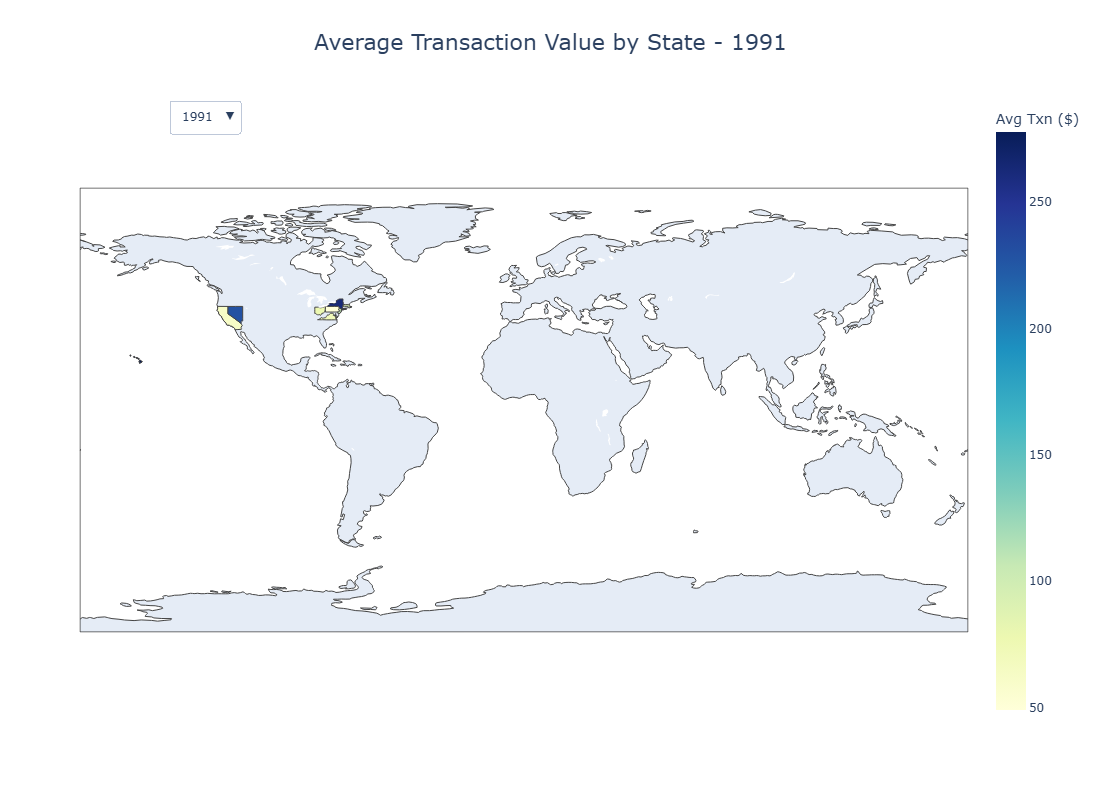

In [111]:
fig = go.Figure()

years = df_region_summary['txn_year'].unique()

for year in years:
    df_year = df_region_summary[df_region_summary['txn_year'] == year]
    fig.add_trace(go.Choropleth(
        locations=df_year['merchant_state'],
        z=df_year['avg_txn'],
        locationmode='USA-states',
        colorscale='YlGnBu',
        colorbar_title="Avg Txn ($)",
        visible=False,
        name=str(year)))

fig.data[0].visible = True

buttons = []
for i, year in enumerate(years):
    buttons.append(dict(
        label=str(year),
        method="update",
        args=[
            {"visible": [j == i for j in range(len(years))]},
            {"title": f"Average Transaction Value by State - {year}"}]))

fig.update_layout(
    width=1200,
    height=800,
    title={
        'text': f"Average Transaction Value by State - {years[0]}",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22)},
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.1,
        y=1,
        xanchor='left',
        yanchor='top')])

fig.show()

### Yearly txn count by Region

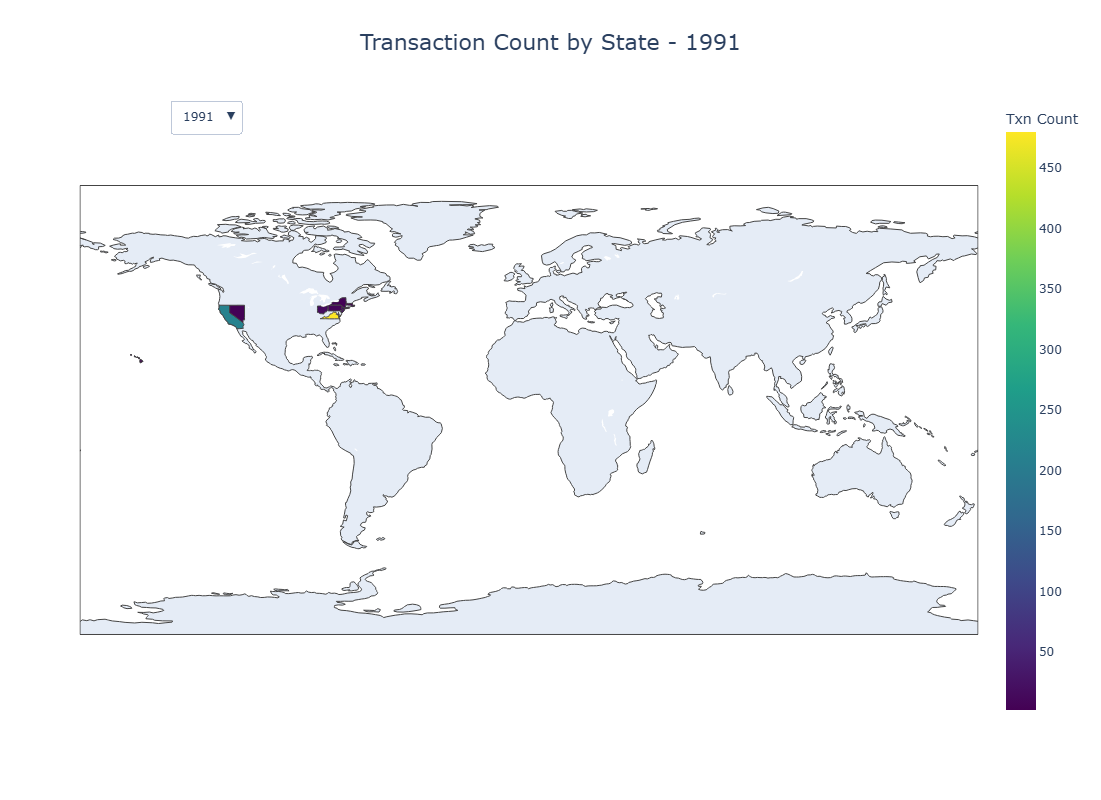

In [105]:
fig2 = go.Figure()

years = df_region_summary['txn_year'].unique()

for year in years:
    df_year = df_region_summary[df_region_summary['txn_year'] == year]
    fig2.add_trace(go.Choropleth(
        locations=df_year['merchant_state'],
        z=df_year['txn_count'],
        locationmode='USA-states',
        colorscale='Viridis',
        colorbar_title="Txn Count",
        visible=False,
        name=str(year)))

fig2.data[0].visible = True

buttons2 = []
for i, year in enumerate(years):
    buttons2.append(dict(
        label=str(year),
        method="update",
        args=[
            {"visible": [j == i for j in range(len(years))]},
            {"title": f"Transaction Count by State - {year}"}]))

fig2.update_layout(
    width=1200,
    height=800,
    title={
        'text': f"Transaction Count by State - {years[0]}",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22)},
    updatemenus=[dict(
        active=0,
        buttons=buttons2,
        x=0.1,
        y=1,
        xanchor='left',
        yanchor='top')])

fig2.show()

### Yearly total spent by Region

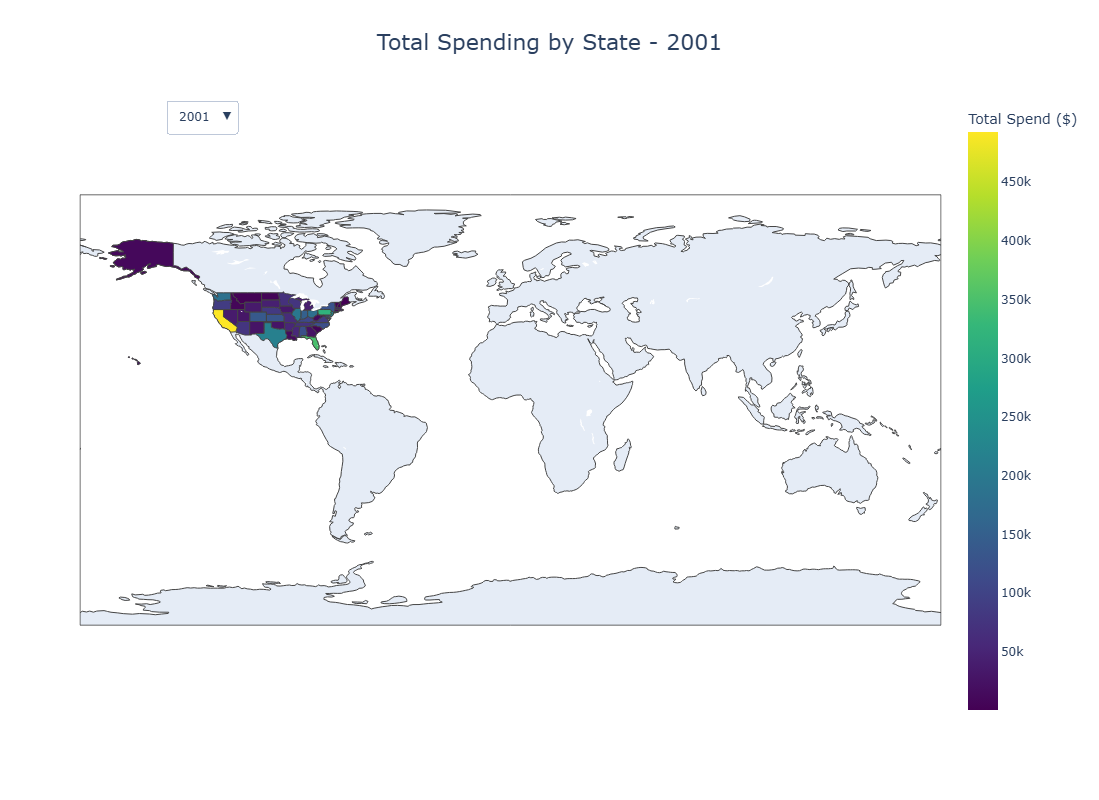

In [109]:
fig3 = go.Figure()

years = df_region_summary['txn_year'].unique()

for year in years:
    df_year = df_region_summary[df_region_summary['txn_year'] == year]
    fig3.add_trace(go.Choropleth(
        locations=df_year['merchant_state'],
        z=df_year['total_spend'],                
        locationmode='USA-states',
        colorscale='Viridis',
        colorbar_title="Total Spend ($)",          
        visible=False,
        name=str(year)))

# Make first year visible
fig3.data[0].visible = True

# Create buttons for each year
buttons3 = []
for i, year in enumerate(years):
    buttons3.append(dict(
        label=str(year),
        method="update",
        args=[
            {"visible": [j == i for j in range(len(years))]},
            {"title": f"Total Spending by State - {year}"}]))

fig3.update_layout(
    width=1200,
    height=800,
    title={
        'text': f"Total Spending by State - {years[0]}",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=22)},
    updatemenus=[dict(
        active=0,
        buttons=buttons3,
        x=0.1,
        y=1,
        xanchor='left',
        yanchor='top')])

fig3.show()

## Export

In [110]:
# Export region summary
df_region_summary.to_csv(os.path.join(path, '02_Data', 'Prepared Data','df_region_summary.csv'), index=False)

# Regression Line 

In [21]:
df_txn_v_incm = (
    df_credit_usa.groupby(['user_id', 'yearly_income_person', 'txn_year'])
    .agg(txn_average=('txn_amount', 'mean'))
    .reset_index())

In [22]:
df_txn_v_incm.head(50)

user_id  yearly_income_person  txn_year  txn_average
0         0               59696.0      2003   108.214827
1         0               59696.0      2004   108.903404
2         0               59696.0      2005   109.032642
3         0               59696.0      2006   104.871945
4         0               59696.0      2007   103.069856
5         0               59696.0      2008    99.573586
6         0               59696.0      2009    99.418704
7         0               59696.0      2010    97.903766
8         0               59696.0      2011    99.412289
9         0               59696.0      2012   116.705826
10        0               59696.0      2013   108.326715
11        0               59696.0      2014   105.003967
12        0               59696.0      2015   102.428592
13        0               59696.0      2016   101.056399
14        0               59696.0      2017    99.695859
15        0               59696.0      2018    94.583595
16        0               59696.0      2019   102.085264
17        0               59696.0      2020    95.492206
18        1               77254.0      2003   140.708235
19        3              249925.0      2010  1195.460000
20        3              249925.0      2011   211.574723
21        3              249925.0      2012   198.243374
22        3              249925.0      2013   181.256117
23        3              249925.0      2014   198.782943
24        3              249925.0      2015   186.830175
25        5               41997.0      2002    61.453639
26        5               41997.0      2003    60.566356
27        5               41997.0      2004    62.650992
28        5               41997.0      2005    63.327919
29        5               41997.0      2006    59.461577
30        5               41997.0      2007    59.971813
31        5               41997.0      2008    66.946729
32        5               41997.0      2009    65.533866
33        5               41997.0      2010    72.179222
34        5               41997.0      2011    62.362561
35        5               41997.0      2012    65.500115
36        5               41997.0      2013    62.615211
37        5               41997.0      2014    57.413117
38        5               41997.0      2015    58.247428
39        5               41997.0      2016    59.509473
40        5               41997.0      2017    57.629427
41        5               41997.0      2018    58.402524
42        5               41997.0      2019    60.312094
43        5               41997.0      2020    56.458427
44        6               51500.0      2010    82.468934
45        6               51500.0      2011    65.134755
46        6               51500.0      2012    58.157594
47        6               51500.0      2013    62.566047
48        6               51500.0      2014    61.859826
49        6               51500.0      2015    59.649942

### Export

In [24]:
df_txn_v_incm.to_csv(os.path.join(path, '02_Data', 'Prepared Data','df_txn_v_incm.csv'), index=False)